# This Project tries to perform instagram Reach analysis using python which will help content creators to understand how to draw to adapt to changes in instagram in the long run

# **WE are importing some library**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.graph_objs as go 
import plotly.express as px

import sys
import re

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

## Read csv **File**

In [2]:
# To read csv file
df = pd.read_csv('/content/instagran_reserch.csv')

In [3]:
#To check the columns
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [4]:
#To print the head
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920.0,2586.0,1028.0,619.0,56.0,98.0,9.0,5.0,162.0,35.0,2.0,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394.0,2727.0,1838.0,1174.0,78.0,194.0,7.0,14.0,224.0,48.0,10.0,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021.0,2085.0,1188.0,0.0,533.0,41.0,11.0,1.0,131.0,62.0,12.0,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528.0,2700.0,621.0,932.0,73.0,172.0,10.0,7.0,213.0,23.0,8.0,Here s how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518.0,1704.0,255.0,279.0,37.0,96.0,5.0,4.0,123.0,8.0,0.0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [5]:
#checking the shape of data
df.shape

(100, 13)

In [6]:
# To print the tail of data
df.tail()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
95,5394.0,2275.0,2975.0,45.0,65.0,61.0,19.0,6.0,147.0,69.0,6.0,You must have heard or invested in any cryptoc...,#data #datascience #dataanalysis #dataanalytic...
96,2766.0,2541.0,116.0,51.0,9.0,40.0,10.0,4.0,114.0,11.0,6.0,Here are all the programming languages that Fa...,#programming #coding #programmer #python #deve...
97,3924.0,2244.0,1278.0,326.0,34.0,139.0,11.0,3.0,151.0,19.0,2.0,Here are some of the most popular data science...,#data #datascience #dataanalysis #dataanalytic...
98,3015.0,2034.0,771.0,115.0,41.0,52.0,11.0,4.0,92.0,9.0,2.0,Here s how Amazon uses your data as an e-comme...,#data #datascience #dataanalysis #dataanalytic...
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# The index property returns the index information of the DataFrame.
df.index

RangeIndex(start=0, stop=100, step=1)

In [8]:
# Before starting everything, let’s have a look at whether this dataset contains any null values or not
df.isnull().sum()

Impressions       1
From Home         1
From Hashtags     1
From Explore      1
From Other        1
Saves             1
Comments          1
Shares            1
Likes             1
Profile Visits    1
Follows           1
Caption           1
Hashtags          1
dtype: int64

In [9]:
# we got some null  value in every coulmns let drop it and go ahead.
df.dropna(inplace=True )

In [10]:
# Recheck the value
df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [11]:
# after dropping the null values we have to reset the index values
df.reset_index(inplace= True , drop = True)

In [12]:
# check the data types
df.dtypes

Impressions       float64
From Home         float64
From Hashtags     float64
From Explore      float64
From Other        float64
Saves             float64
Comments          float64
Shares            float64
Likes             float64
Profile Visits    float64
Follows           float64
Caption            object
Hashtags           object
dtype: object

In [13]:
# convert the float values in integer 
df = df.astype({'Impressions':'int','From Home':'int' ,'From Hashtags':'int', 'From Explore' : 'int' , 
                'From Other' : 'int' , 'Saves' : 'int' , 'Comments' : 'int' , 'Shares' : 'int',
                'Likes' : 'int','Profile Visits' : 'int','Follows' : 'int'})
print(df.dtypes)

Impressions        int64
From Home          int64
From Hashtags      int64
From Explore       int64
From Other         int64
Saves              int64
Comments           int64
Shares             int64
Likes              int64
Profile Visits     int64
Follows            int64
Caption           object
Hashtags          object
dtype: object


In [14]:
# describe the values
df.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.00000,99.000000,99.000000,99.000000
mean,4644.131313,2267.808081,1738.252525,417.040404,137.242424,126.909091,6.959596,8.00000,160.333333,38.424242,11.979798
std,2291.474570,567.121422,1800.561054,511.751971,184.376118,107.821100,3.610979,7.39829,64.883884,58.915555,18.838725
min,1941.000000,1179.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.00000,72.000000,4.000000,0.000000
25%,3225.000000,1960.000000,655.000000,124.500000,36.000000,61.000000,5.000000,3.00000,116.500000,14.000000,2.000000
50%,3990.000000,2195.000000,1248.000000,249.000000,69.000000,104.000000,7.000000,6.00000,150.000000,21.000000,6.000000
75%,5172.500000,2577.500000,2222.000000,496.000000,157.500000,144.000000,9.000000,11.50000,188.500000,36.500000,11.000000
max,16062.000000,4137.000000,11817.000000,2355.000000,1115.000000,668.000000,19.000000,41.00000,416.000000,347.000000,100.000000


In [15]:
# describe the all values
df.describe(include = 'all')

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.00000,99.000000,99.000000,99.000000,99,99
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,44
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Here are some of the best data science project...,#data #datascience #dataanalysis #dataanalytic...
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,16
mean,4644.131313,2267.808081,1738.252525,417.040404,137.242424,126.909091,6.959596,8.00000,160.333333,38.424242,11.979798,NaN,NaN
std,2291.474570,567.121422,1800.561054,511.751971,184.376118,107.821100,3.610979,7.39829,64.883884,58.915555,18.838725,NaN,NaN
min,1941.000000,1179.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.00000,72.000000,4.000000,0.000000,NaN,NaN
25%,3225.000000,1960.000000,655.000000,124.500000,36.000000,61.000000,5.000000,3.00000,116.500000,14.000000,2.000000,NaN,NaN
50%,3990.000000,2195.000000,1248.000000,249.000000,69.000000,104.000000,7.000000,6.00000,150.000000,21.000000,6.000000,NaN,NaN
75%,5172.500000,2577.500000,2222.000000,496.000000,157.500000,144.000000,9.000000,11.50000,188.500000,36.500000,11.000000,NaN,NaN


In [16]:
# Reprint the head to check the values 
df.head(3)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...


In [17]:
df.columns


Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [18]:
df.columns=(['Reach', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'])

In [19]:
df.columns

Index(['Reach', 'From Home', 'From Hashtags', 'From Explore', 'From Other',
       'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows',
       'Caption', 'Hashtags'],
      dtype='object')

In [20]:
# to get the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Reach           99 non-null     int64 
 1   From Home       99 non-null     int64 
 2   From Hashtags   99 non-null     int64 
 3   From Explore    99 non-null     int64 
 4   From Other      99 non-null     int64 
 5   Saves           99 non-null     int64 
 6   Comments        99 non-null     int64 
 7   Shares          99 non-null     int64 
 8   Likes           99 non-null     int64 
 9   Profile Visits  99 non-null     int64 
 10  Follows         99 non-null     int64 
 11  Caption         99 non-null     object
 12  Hashtags        99 non-null     object
dtypes: int64(11), object(2)
memory usage: 10.2+ KB


# After cleaning part let go ahead to the graphical part to know about reach of Instagram


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc548ba950>,
      dtype=object)

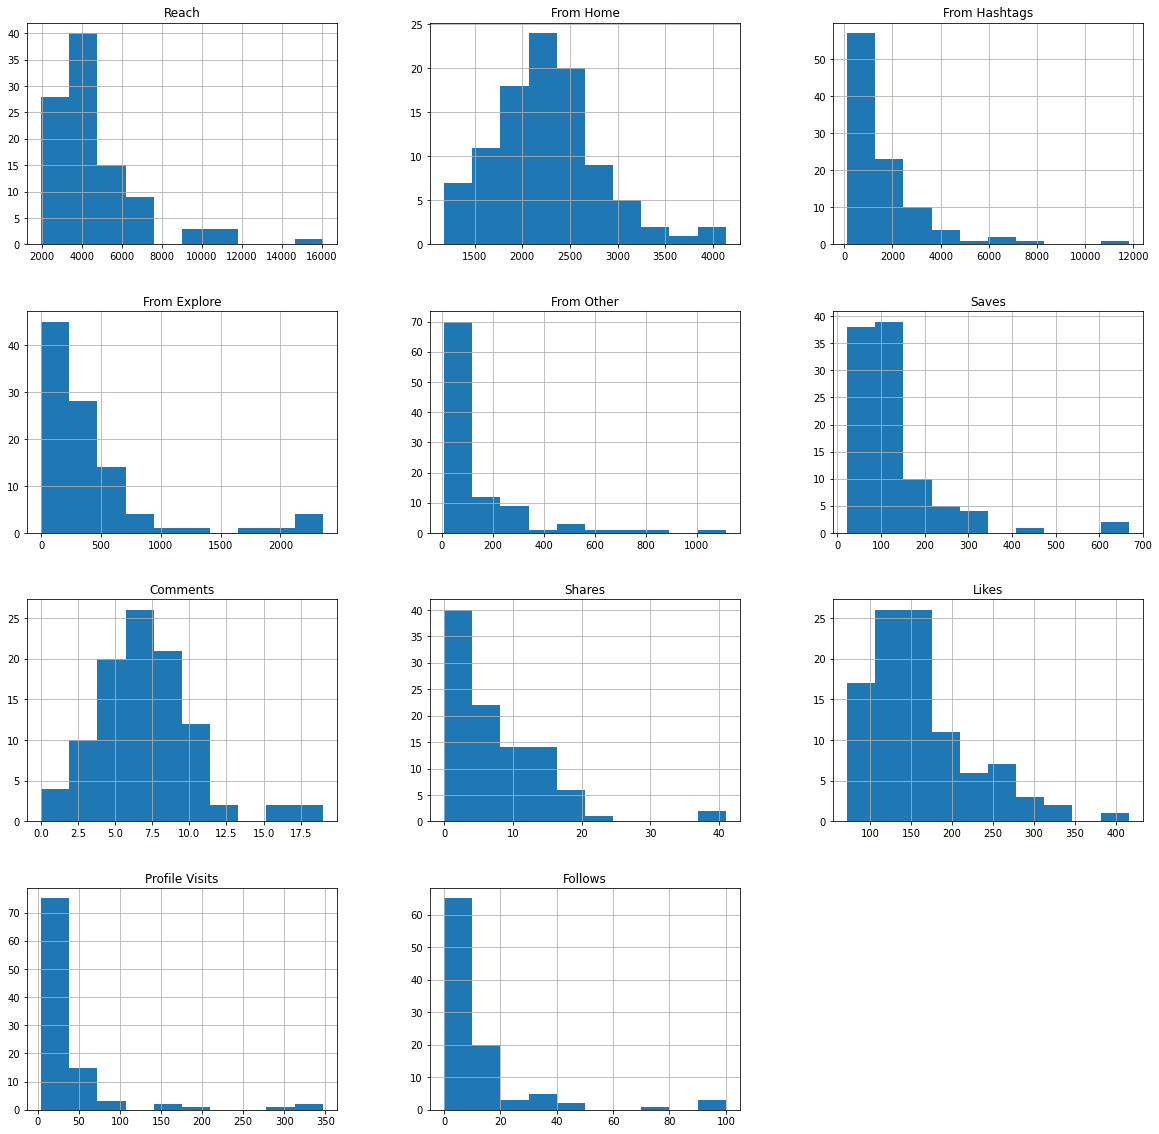

In [21]:
# first we plot histogram to each column 
df.hist(figsize = (20 , 20))

In [22]:
df.head(1)

,Reach,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


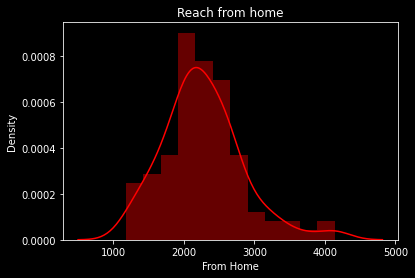

In [23]:
# First  we plot a distance graph from Home  to check the Reach of instagram .
plt.style.use('dark_background')
plt.title('Reach from home')

sns.distplot(df['From Home'] , color = 'Red' )
plt.show()


### The Reach I get From  Home section on Instagram shows how much my posts reach my followers. Looking at the From Home, I can say it’s hard to reach all my followers daily.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


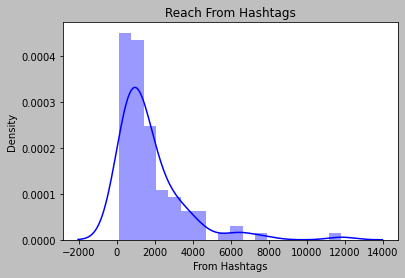

In [24]:
# Similarly we plot a distance graph from Hashtags  to check the Reach of instagram
plt.style.use('grayscale')
plt.title('Reach From Hashtags')
sns.distplot(df['From Hashtags'], color = 'Blue')
plt.show()


### The Reach I get From  Hashtags section on Instagram shows how much my posts reach my followers. Looking at the From Hashtags , I can say that with help of Hashtags we can gain a new user , and Reach also.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


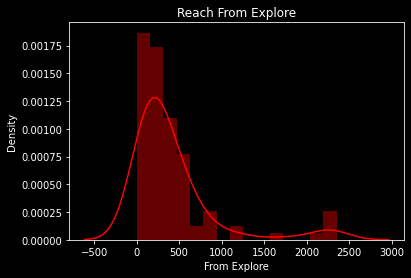

In [25]:
# Similarly  we plot a distance graph from Explore to check the Reach of instagram
plt.style.use('dark_background')
plt.title('Reach From Explore')
sns.distplot(df['From Explore'] , color = 'Red' )
plt.show()

### The Reach I get From Explore section on Instagram shows how much my posts reach my followers. Looking at the From Explore . The Instagram Explore page is where Instagram curates content for its users. Every user will see different content on their Explore page, and this is based on the posts they like, and the people they follow.
 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


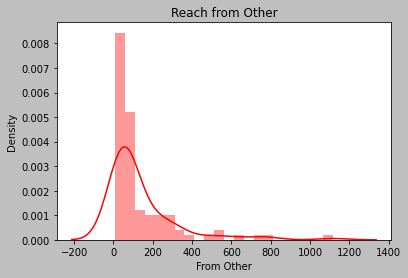

In [26]:
# Similarly  we plot a distance graph from Other  to check the Reach of instagram
plt.style.use('grayscale')
plt.title('Reach from Other')
sns.distplot(df['From Other'] , color = 'Red' )

### There are some Reach which get From Other section to Gain New follower or new user in Instagram . 

# After That let's Plot a graph of percentage to know the reach of instagram

In [27]:
home = df["From Home"].sum()
hashtags = df["From Hashtags"].sum()
explore = df["From Explore"].sum()
other = df["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']

values = [home, hashtags, explore, other]


fig = px.pie(df, values=values, names=labels, 
             title='Reach on Instagram Posts From Various Sources', hole=0.3)
fig.show()

## So the above donut plot shows that almost 49.7 per cent of the reach is From Home Section, 38.1 per cent is From Hashtags, 9.14 per cent is From Explore section, and 3.01 per cent is From Other sources.

In [28]:
# Afte that we plot a  pie Graph to Know the percentage of Reach coming from Likes , Profile , Follows , Share.
like = df["Likes"].sum()
profile = df["Profile Visits"].sum()
follows = df["Follows"].sum()
share = df["Shares"].sum()

labels = ['Likes','Profile Visits','Follows','Shares']

values = [like, profile, follows, share]

fig = px.pie(df, values=values, names=labels, 
             title='Reach on Instagram Posts From Various Sources', hole=0.3 )
fig.update_traces(pull=[0.1, 0, 0, 0])
fig.show()

## So the above pie plot shows that almost 73.3 per cent of the Reach is coming from the Like Section,  17.6 per cent is Reach is coming from the  Profile visits, 5.48 per cent of reach coming the Follows, and 3.66 per cent is coming from the Shares.

In [29]:
# we just plot a Sunburst graph .
fig = px.sunburst(df, path = ['Comments', 'Likes','Reach'],
    values='Reach',
    width = 700,
    height = 700,
    color_continuous_scale="RdY1Gn", 
    title="Reach on instgram from likes and comments ",
    hover_data = {'Comment' : df['Comments'] , 'Like' : df['Likes'] , 'Reachs' : df['Reach'] }
    
)

fig.show()

In [30]:
df.columns

Index(['Reach', 'From Home', 'From Hashtags', 'From Explore', 'From Other',
       'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows',
       'Caption', 'Hashtags'],
      dtype='object')

# Analyzing Two Content one is Hashtags and another is Caption.


# Let First plot the Hastags content to Doing the Hastags we import the Wordcloud libraries


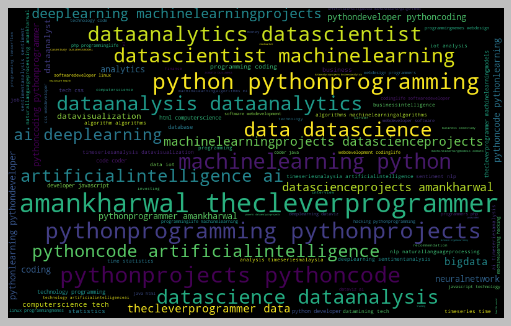

In [31]:
words = ' '.join(i for i in df['Hashtags']) 

wordcloud = WordCloud(height = 500, width = 800, random_state=21, max_font_size=120).generate(words)
plt.style.use('classic') 
plt.imshow(wordcloud, interpolation = 'bilinear') 
plt.axis('off') 
plt.show() 

### The Second plot is a Caption content .






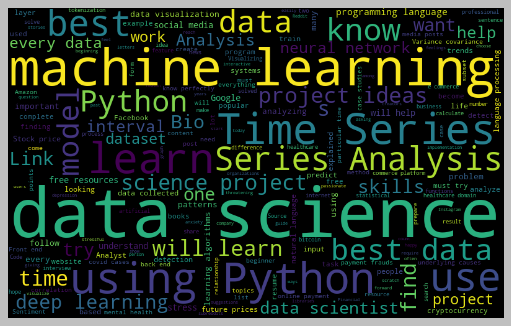

In [32]:
words = ' '.join(i for i in df['Caption']) 
wordcloud = WordCloud(height = 500, width = 800, random_state=21, max_font_size=120).generate(words) 
plt.imshow(wordcloud, interpolation = 'bilinear') 
plt.axis('off') 
plt.show() 

# Analyzing Relationships

## Let analyse the relationships between Number of Reach with the help of Number of likes Using scatter plot. It will also help us in understanding how the Instagram algorithm works.

In [51]:

fig = px.scatter(data_frame = df, x="Reach",
                    y="Likes", size="Likes", trendline="ols", color = 'Likes',
                    title = "Relationship Between Likes and Reach")
fig.show()

There is a Linear graph between Number of Reach and Number of Likes.

In [34]:
df.columns

Index(['Reach', 'From Home', 'From Hashtags', 'From Explore', 'From Other',
       'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows',
       'Caption', 'Hashtags'],
      dtype='object')

## Now let Analysing the another plot with the help of Number of Comments and Number of Reach of my instagram post.

In [35]:
fig = px.scatter(data_frame = df, x="Reach",
                    y="Comments", size="Comments", trendline="ols", color = 'Comments',
                    title = "Relationship Between Comments and Reach")
fig.show()

### It looks like the number of comments we get on a post doesn’t affect its reach.

# Now let Analysing the another plot with the help of Number of Saves and Number of Reach of my instagram post.

In [36]:
fig = px.scatter(data_frame = df, x="Reach",
                    y="Saves", size="Saves", trendline="ols", color = 'Saves',
                    title = "Relationship Between Saves and Reach")
fig.show()

### There is a Linear graph between Number of Saves and Number of Reach But i does not much more effect to get more reach on my instagram posts.

# Now let Analysing the another plot with the help of Number of Shares and Number of Reach of my instagram post.

In [37]:
fig = px.scatter(data_frame = df, x="Reach",
                    y="Shares", size="Shares", trendline="ols", color = 'Shares',
                    title = "Relationship Between Shares and Reach")
fig.show()

### There is a Linear graph between Number of Shares and Number of Reach But it does  much more effect to get more reach .when number of shares is more we will get more reach on instagram of my  posts .

In [38]:
df.head(1)

,Reach,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...


## There is a linear relationship between the number of times my post is saved and the reach of my Instagram post. Now let’s have a look at the correlation of all the columns with the Reach column


# Let's check correlation of instgram using Reach column.

In [39]:
correlation = df.corr()
correlation

,Reach,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
Reach,1.000000,0.603378,0.892682,0.498389,0.429227,0.625600,0.247201,0.476617,0.896277,0.774393,0.804064
From Home,0.603378,1.000000,0.247775,0.627201,0.253017,0.751234,0.404574,0.619734,0.753177,0.318869,0.484809
From Hashtags,0.892682,0.247775,1.000000,0.117056,0.264955,0.321904,0.189838,0.250159,0.715534,0.793107,0.678926
From Explore,0.498389,0.627201,0.117056,1.000000,0.299308,0.748407,0.033685,0.531271,0.537275,0.143380,0.431809
From Other,0.429227,0.253017,0.264955,0.299308,1.000000,0.248961,-0.082457,0.085182,0.336636,0.437586,0.588807
Saves,0.625600,0.751234,0.321904,0.748407,0.248961,1.000000,0.137822,0.744239,0.761749,0.181447,0.396706
Comments,0.247201,0.404574,0.189838,0.033685,-0.082457,0.137822,1.000000,0.182959,0.307451,0.205561,0.104389
Shares,0.476617,0.619734,0.250159,0.531271,0.085182,0.744239,0.182959,1.000000,0.575453,0.174526,0.301200
Likes,0.896277,0.753177,0.715534,0.537275,0.336636,0.761749,0.307451,0.575453,1.000000,0.586680,0.638916
Profile Visits,0.774393,0.318869,0.793107,0.143380,0.437586,0.181447,0.205561,0.174526,0.586680,1.000000,0.872862


# After that we plot a Heatmap to know the better visualize the volume of the Events.

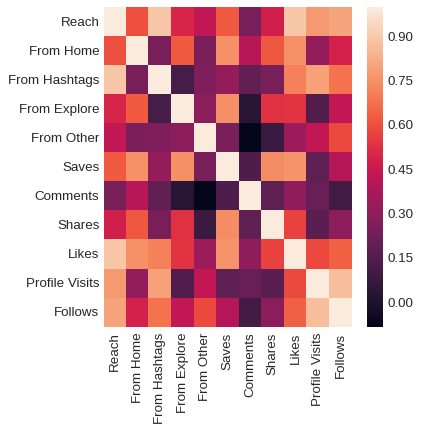

In [40]:
plt.style.use("seaborn-whitegrid") 
plt.figure(figsize=(5,5)) 
sns.heatmap(df.corr()) 
plt.show() 

In [41]:
compare = df.corr()
print(compare["Reach"].sort_values(ascending=False))

Reach             1.000000
Likes             0.896277
From Hashtags     0.892682
Follows           0.804064
Profile Visits    0.774393
Saves             0.625600
From Home         0.603378
From Explore      0.498389
Shares            0.476617
From Other        0.429227
Comments          0.247201
Name: Reach, dtype: float64


# Let Analysing the  plot with the help of Number of Shares and Number of Profile Visits of my instagram post.

In [42]:
fig = px.scatter(data_frame = df, x="Profile Visits",
                    y="Shares", size="Shares", trendline="ols", 
                    title = "Relationship Between Profile Visits and shares Gained")
fig.show()

## There is a Linear graph between Number of Shares and Number of Profile Visits  .when number of shares is more we will get more reach on instagram of my posts and number of new user come to visits your profile and instagram post and it will get a more reach also on instagram .

In [43]:
df.head(1)

,Reach,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...


# conversion rate

After that we check the conversion rate In Instagram, Conversion  rate means how many followers you are getting from the number of profile visits from a post rate of Number of Follows . The Conversion rate of formula is a (Follows/Profile Visits)*100 .

In [44]:
conversion_rate = (df["Follows"].sum() / df["Profile Visits"].sum()) * 100
print(conversion_rate)

31.17770767613039


## So the conversation rate of my Instagram account is 31.77 percent which sounds  look like a very good conversion rate

In [45]:
figure = px.scatter(data_frame = df, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols", 
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

### The relationship between number of profile visits and number of followers gained  linear. when number of Profile visits is  gained on instagram then the number of followers also gained on my  instagram  account.

# Instagram Reach Prediction Model 

###  we will train a machine learning model to predict the reach of an Instagram post. Let’s split the data into training and test sets before training the model:

In [46]:
df.columns

Index(['Reach', 'From Home', 'From Hashtags', 'From Explore', 'From Other',
       'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows',
       'Caption', 'Hashtags'],
      dtype='object')

In [47]:
x = np.array(df[['Likes' , 'Comments' , 'Shares' , 'Profile Visits' ,'Follows' , 'Saves']])
y = np.array(df['Reach'])
xtrain, xtest, ytrain, ytest =  train_test_split(x,y , test_size = 0.1 , random_state = 38) 

## Now here’s is how we can train a machine learning model to predict the reach of an Instagram post using Python:

In [48]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.9634095687880675

In [49]:
# df.sort_values(by=['Likes' ],ascending=False)

## Now let’s predict the reach of an Instagram post by giving inputs to the machine learning model:

In [50]:
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[300, 220, 8, 9, 140, 40]])
model.predict(features)

array([12984.31918951])

# So this is how you can analyze and predict the reach of Instagram posts with machine learning using Python. If a content creator wants to do well on Instagram in a long run, they have to look at the data of their Instagram reach. 